In [ ]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 17.5 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=36d91d19a4ba4361427fef9e27d27498236a4f53a42e7cde1d34e441a30aed65
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


In [ ]:
 ## Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mlcroissant as mlc
from scipy import stats

In [ ]:
##Carga de archivos desde una URL
url = 'https://www.datos.gov.co/resource/ek3f-5wn4.json?$limit=134372'
## Se indica que el DF es tipo JSON
df_tarifas_gn = pd.read_json(url)

In [ ]:
## Se observa la forma de DF
df_tarifas_gn.shape


(134372, 14)

In [ ]:
## Se observa los datos estadisticos basicos
## Con el objetivo de identificar valores atipicos o nulos
df_tarifas_gn.describe()

,ano,mes,nit,id_mercado,id_empresa,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
count,134372.000000,134372.000000,1.343720e+05,134372.000000,134372.000000,134372.000000,1.343720e+05,1.343720e+05,1.343720e+05,1.343720e+05,1.343720e+05,134372.000000
mean,2018.102946,6.459992,8.557540e+09,150.227056,5075.012532,3.367487,6.052740e+05,1.929199e+05,2.988732e+04,2.221084e+03,2.190022e+03,1538.626743
std,3.126079,3.408614,4.151421e+08,166.083751,8956.699502,1.693608,1.701886e+05,1.418797e+05,3.256611e+04,1.449866e+04,1.532213e+04,1409.837584
min,2005.000000,1.000000,8.000078e+09,9.000000,484.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.009710e+03,0.000000e+00,0.000000
25%,2016.000000,4.000000,8.040118e+09,47.000000,564.000000,2.000000,5.195480e+05,9.400000e+04,2.240600e+04,0.000000e+00,1.060000e+03,910.722500
50%,2018.000000,6.000000,8.901017e+09,113.000000,620.000000,3.000000,5.806510e+05,1.652000e+05,2.865700e+04,2.407420e+03,1.581695e+03,1568.000000
75%,2021.000000,9.000000,8.909050e+09,179.000000,2097.000000,5.000000,6.420880e+05,2.232300e+05,3.565000e+04,3.521520e+03,2.415150e+03,2161.510000
max,2023.000000,12.000000,9.010428e+09,1825.000000,37253.000000,6.000000,1.870000e+06,9.826062e+06,4.600208e+06,3.723696e+06,5.119020e+06,157525.000000


In [ ]:
## Observamos las columnas del DF
df_tarifas_gn.columns

Index(['ano', 'mes', 'empresa', 'municipios', 'nit', 'id_mercado',
       'id_empresa', 'estrato', 'conexion', 'reinstalacion', 'reconexion',
       'cargo_fijo', 'rango_0', 'rango_21'],
      dtype='object')

# LIMPIEZA DEL DF

In [ ]:
## Eliminamos columnas que no se necesitan en el analisis
df_tarifas_gn.drop(['nit', 'id_mercado','id_empresa'], axis=1, inplace=True)

In [ ]:
## Observamos el nuevo DF
df_tarifas_gn

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
0,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,BALBOA - DOSQUEBRADAS - LA CELIA - LA VIRGINIA...,1,718800.0,222500.0,51000.0,0.0,1264.72,2427.17
1,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,CHINCHINA - MANIZALES - NEIRA - PALESTINA - VI...,1,718800.0,222500.0,51000.0,0.0,1268.00,2451.65
2,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,AGUADAS - ANSERMA - ARANZAZU - BELALCAZAR - PA...,1,718800.0,222500.0,51000.0,0.0,1413.73,2904.96
3,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,1,718800.0,222500.0,51000.0,0.0,1372.52,2696.27
4,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,2,718800.0,222500.0,51000.0,0.0,1714.46,2696.27
...,...,...,...,...,...,...,...,...,...,...,...
134367,2013,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,EL GUAMO,3,488178.0,124414.0,27349.0,2947.0,1357.00,0.00
134368,2013,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,PUERTO BERRIO,3,488178.0,124414.0,27349.0,1235.0,767.00,0.00
134369,2013,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,CISNEROS,3,488178.0,124414.0,27349.0,1235.0,943.00,0.00
134370,2013,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,LA UNION,3,488178.0,124414.0,27349.0,4212.0,966.00,0.00


In [ ]:
## Se realiza un filtro para identificar las entradas en el año 2005
df_2005 = df_tarifas_gn[df_tarifas_gn['ano']==2005]
df_2005

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
123967,2005,10,ESPIGAS S.A. E.S.P.,MONIQUIRA,3,340706.0,100000.0,9800.0,2983.00,671.40,671.40
124960,2005,9,GASES DEL LLANO S.A. E.S.P.,ACACIAS,6,359446.0,230177.0,13552.0,4555.00,504.00,504.00
124989,2005,5,METROGAS DE COLOMBIA S.A. E.S.P,FLORIDABLANCA,3,359446.0,115766.0,28410.0,1262.49,533.55,533.55
125011,2005,2,GASES DEL LLANO S.A. E.S.P.,ACACIAS,5,359446.0,230177.0,13552.0,4555.00,353.00,353.00


In [ ]:
## Eliminamos las entradas con los años 2005
df_tarifas_gn.drop([123967,124960,124989,125011], axis=0, inplace=True)

In [ ]:
## Verificamos que no hayan entradas del año 2005
(df_tarifas_gn['ano']==2005).sum()

np.int64(0)

In [ ]:
## Se mira si hay entradas para el año 2006
(df_tarifas_gn['ano']==2006).sum()

np.int64(99)

In [ ]:
## Se realiza un filtro para identificar las entradas en el año 2006
df_2006 = df_tarifas_gn[df_tarifas_gn['ano'] == 2006]
df_2006

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
630,2006,11,GASES DEL CUSIANA S.A. E.S.P,AGUAZUL - MONTERREY - VILLANUEVA,4,376879.0,241341.0,14489.0,3099.00,355.00,355.00
794,2006,11,GASES DEL CUSIANA S.A. E.S.P,TAURAMENA,3,376879.0,241341.0,14489.0,3099.00,302.00,302.00
1218,2006,11,GASES DEL CUSIANA S.A. E.S.P,AGUAZUL - MONTERREY - VILLANUEVA,3,376879.0,241341.0,14489.0,3099.00,334.00,334.00
2038,2006,11,GASES DEL CUSIANA S.A. E.S.P,AGUAZUL - MONTERREY - VILLANUEVA,3,376879.0,241341.0,14489.0,3099.00,334.00,334.00
2774,2006,11,GASES DEL CUSIANA S.A. E.S.P,AGUAZUL - MONTERREY - VILLANUEVA,3,376879.0,241341.0,14489.0,3099.00,355.00,355.00
...,...,...,...,...,...,...,...,...,...,...,...
122514,2006,2,MADIGAS INGENIEROS S.A. E.S.P.,ACACIAS,3,376877.0,41228.0,12868.0,2900.00,270.00,270.00
122530,2006,1,METROGAS DE COLOMBIA S.A. E.S.P,FLORIDABLANCA,5,376879.0,115766.0,28410.0,1525.54,676.55,676.55
122661,2006,1,METROGAS DE COLOMBIA S.A. E.S.P,FLORIDABLANCA,6,376879.0,115766.0,28410.0,1525.54,676.55,676.55
123124,2006,1,METROGAS DE COLOMBIA S.A. E.S.P,FLORIDABLANCA,4,376879.0,115766.0,28410.0,1271.28,563.79,563.79


In [ ]:
## Identificamos los indices de las entradas en el año 2006
df_2006.index

Index([   630,    794,   1218,   2038,   2774,   3679,   4181,   4285,   5046,
         5082,   5491,   6490,   7131,   7684,   7818,   8113,   8611,   8763,
         8826,   9601,  10808,  13090,  14044,  15871,  25370,  25649,  27847,
        29484,  29520,  29923,  30083,  32112,  32409,  32943,  33438,  33689,
        33900,  34377,  34558,  69354,  69388,  71642,  71890,  72054,  74145,
        74597,  74801,  76527,  78827,  78858,  79018,  79297,  79908,  82999,
        83348,  83602,  83626,  86932,  90033,  90059,  90218,  97160,  98095,
        99334,  99363, 100080, 101106, 103777, 107758, 107889, 108006, 109483,
       110776, 112196, 118099, 118452, 119938, 120751, 120801, 120802, 120804,
       120811, 120919, 120923, 120968, 122213, 122263, 122273, 122275, 122323,
       122325, 122483, 122487, 122506, 122514, 122530, 122661, 123124, 123766],
      dtype='int64')

In [ ]:
## Eliminamos las entradas con los años 2006
df_tarifas_gn.drop([630,    794,   1218,   2038,   2774,   3679,   4181,   4285,   5046,
         5082,   5491,   6490,   7131,   7684,   7818,   8113,   8611,   8763,
         8826,   9601,  10808,  13090,  14044,  15871,  25370,  25649,  27847,
        29484,  29520,  29923,  30083,  32112,  32409,  32943,  33438,  33689,
        33900,  34377,  34558,  69354,  69388,  71642,  71890,  72054,  74145,
        74597,  74801,  76527,  78827,  78858,  79018,  79297,  79908,  82999,
        83348,  83602,  83626,  86932,  90033,  90059,  90218,  97160,  98095,
        99334,  99363, 100080, 101106, 103777, 107758, 107889, 108006, 109483,
       110776, 112196, 118099, 118452, 119938, 120751, 120801, 120802, 120804,
       120811, 120919, 120923, 120968, 122213, 122263, 122273, 122275, 122323,
       122325, 122483, 122487, 122506, 122514, 122530, 122661, 123124, 123766], axis=0, inplace=True)

In [ ]:
## Se mira si hay entradas para el año 2007
(df_tarifas_gn['ano']==2007).sum()

np.int64(844)

In [ ]:
## Se realiza un filtro para identificar las entradas en el año 2007
df_2007 = df_tarifas_gn[df_tarifas_gn['ano']==2007]
df_2007

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
410,2007,9,EFIGAS GAS NATURAL S.A. E.S.P.,BALBOA - DOSQUEBRADAS - LA CELIA - LA VIRGINIA...,1,393762.0,80000.0,23000.0,0.00,281.22,394.00
570,2007,9,EFIGAS GAS NATURAL S.A. E.S.P.,CHINCHINA - MANIZALES - NEIRA - PALESTINA - VI...,1,393600.0,52500.0,16800.0,0.00,275.08,439.90
1217,2007,9,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,1,393762.0,80000.0,23000.0,0.00,336.57,462.70
1397,2007,9,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,2,393762.0,80000.0,23000.0,0.00,403.10,462.70
1398,2007,9,EFIGAS GAS NATURAL S.A. E.S.P.,BALBOA - DOSQUEBRADAS - LA CELIA - LA VIRGINIA...,2,393762.0,80000.0,23000.0,0.00,342.39,394.00
...,...,...,...,...,...,...,...,...,...,...,...
133891,2007,11,GAS NATURAL DEL CESAR S.A. E.S.P.,AGUACHICA - AGUSTIN CODAZZI - BECERRIL - CHIRI...,5,432322.0,80210.0,25220.0,2774.64,785.74,785.74
133892,2007,11,NACIONAL DE SERVICIOS PYBLICOS DOMICILIARIOS S...,VELEZ,2,393761.0,289133.0,21600.0,2335.00,719.38,719.38
134274,2007,11,NACIONAL DE SERVICIOS PYBLICOS DOMICILIARIOS S...,VELEZ,1,393761.0,289133.0,21600.0,2335.00,719.38,719.38
134331,2007,11,GAS NATURAL DEL CESAR S.A. E.S.P.,AGUACHICA - AGUSTIN CODAZZI - BECERRIL - CHIRI...,6,432322.0,80210.0,25220.0,2774.64,785.74,785.74


In [ ]:
## Identificamos los indices de las entradas en el año 2006 y se guarda en un DF
indices = df_2007.index
indices

Index([   410,    570,   1217,   1397,   1398,   1424,   1425,   1454,   1521,
         2425,
       ...
       133213, 133214, 133626, 133627, 133652, 133891, 133892, 134274, 134331,
       134332],
      dtype='int64', length=844)

In [ ]:
## Eliminamos las entradas con los años 2007
df_tarifas_gn.drop(indices, axis=0, inplace=True)

In [ ]:
## Verificamos que no hayan entradas del año 2007
(df_tarifas_gn['ano']==2007).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2008
(df_tarifas_gn['ano']==2008).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2009
(df_tarifas_gn['ano']==2009).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2010
(df_tarifas_gn['ano']==2010).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2011
(df_tarifas_gn['ano']==2011).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2012
(df_tarifas_gn['ano']==2012).sum()

np.int64(54)

In [ ]:
## Se realiza un filtro para identificar las entradas en el año 2012 y se miran sus indices
df_2012 = df_tarifas_gn[df_tarifas_gn['ano']==2012]
df_2012.index

Index([120969, 120970, 120971, 120972, 120973, 120974, 120975, 120976, 120979,
       120980, 120981, 120983, 120985, 120986, 120989, 120991, 120994, 120997,
       120998, 120999, 121000, 121001, 121002, 121003, 121004, 121005, 121006,
       121007, 121008, 121015, 121016, 121020, 121021, 121022, 121026, 121027,
       121028, 121029, 121032, 121051, 121052, 121053, 121090, 121094, 121095,
       121096, 121099, 121110, 121111, 121134, 121135, 121136, 121137, 121138],
      dtype='int64')

In [ ]:
## Eliminamos las entradas con los años 2012
df_tarifas_gn.drop(df_2012.index, axis=0, inplace=True)

In [ ]:
## Verificamos que no hayan entradas del año 2012
(df_tarifas_gn['ano']==2012).sum()

np.int64(0)

In [ ]:
## Verificamos si hay entradas del año 2023
(df_tarifas_gn['ano']==2023).sum()

np.int64(9356)

In [ ]:
## Se realiza un filtro para identificar las entradas en el año 2023
df_2023 = df_tarifas_gn[df_tarifas_gn['ano']==2023]
df_2023

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
0,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,BALBOA - DOSQUEBRADAS - LA CELIA - LA VIRGINIA...,1,718800.0,222500.0,51000.0,0.0,1264.72,2427.17
1,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,CHINCHINA - MANIZALES - NEIRA - PALESTINA - VI...,1,718800.0,222500.0,51000.0,0.0,1268.00,2451.65
2,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,AGUADAS - ANSERMA - ARANZAZU - BELALCAZAR - PA...,1,718800.0,222500.0,51000.0,0.0,1413.73,2904.96
3,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,1,718800.0,222500.0,51000.0,0.0,1372.52,2696.27
4,2023,10,EFIGAS GAS NATURAL S.A. E.S.P.,ARMENIA - CALARCA - CIRCASIA - FILANDIA - LA T...,2,718800.0,222500.0,51000.0,0.0,1714.46,2696.27
...,...,...,...,...,...,...,...,...,...,...,...
9407,2023,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,ACHI - ALTOS DEL ROSARIO - ARENAL - BARRANCO D...,3,617876.0,152868.0,41508.0,4226.0,1627.00,1627.00
9408,2023,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,EL GUAMO,3,617876.0,152868.0,41508.0,4030.0,1627.00,1627.00
9409,2023,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,PUNTA ARENA - TIERRA BOMBA - CANO DEL ORO - BO...,3,617876.0,152868.0,41508.0,4145.0,1627.00,1627.00
9410,2023,1,SURTIDORA DE GAS DEL CARIBE S.A. E.S.P,LA UNION,3,617876.0,152868.0,41508.0,5786.0,1627.00,1627.00


In [ ]:
## Identificamos los indices de las entradas en el año 2023 y se guarda en un DF
indices2 = df_2023.index
indices2

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411],
      dtype='int64', length=9356)

In [ ]:
## Eliminamos las entradas con los años 2023
df_tarifas_gn.drop(indices2, axis=0, inplace=True)

In [ ]:
## Verificamos que no hayan entradas del año 2023
(df_tarifas_gn['ano']==2023).sum()

np.int64(0)

In [ ]:
## Identificamos si hay valores atipicos para la varible conexión
df_valores_outliers_conexion = df_tarifas_gn[df_tarifas_gn['conexion']>=800000]
df_valores_outliers_conexion

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
13760,2022,9,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,1,1870000.0,122897.0,15500.0,0.00,2161.57,1831.28
13761,2022,9,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,2,1870000.0,122897.0,15500.0,0.00,2150.99,1831.28
13762,2022,9,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,3,1870000.0,122897.0,15500.0,2910.00,1831.28,1831.28
14909,2022,8,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,1,1870000.0,122897.0,15500.0,0.00,2153.18,1913.43
14910,2022,8,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,2,1870000.0,122897.0,15500.0,0.00,2142.63,1913.43
...,...,...,...,...,...,...,...,...,...,...,...
134268,2013,1,PROMOTORA DE SERVICIOS PYBLICOS S.A. E.S.P.,EL CARMEN DE ATRATO,3,1260000.0,330000.0,20000.0,2786.51,6999.54,0.00
134269,2013,1,PROMOTORA DE SERVICIOS PYBLICOS S.A. E.S.P.,ZAPATOCA,3,1260000.0,330000.0,20000.0,2731.16,3555.28,0.00
134283,2013,1,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,1,1450000.0,122897.0,15500.0,0.00,348.00,870.00
134284,2013,1,SERVICIOS PYBLICOS INGENIERYA Y GAS S.A. E.S.P.,CASABIANCA - FALAN - PALOCABILDO - VILLAHERMOSA,2,1450000.0,122897.0,15500.0,0.00,435.00,870.00


In [ ]:
## Identificamos los indices de los valores atipicos para conexion y se guarda en un DF
indices3 = df_valores_outliers_conexion.index
indices3


Index([ 13760,  13761,  13762,  14909,  14910,  14911,  16068,  16069,  16070,
        17228,
       ...
       134263, 134264, 134265, 134266, 134267, 134268, 134269, 134283, 134284,
       134285],
      dtype='int64', length=4924)

In [ ]:
## Se elimina los valores atipicos para la variable conexion
df_tarifas_gn.drop(indices3, axis=0, inplace=True)

In [ ]:
## Identificamos si hay mas valores atipicos para la varible conexión
df_valores_outliers_conexion2 = df_tarifas_gn[df_tarifas_gn['conexion']<=300000]
df_valores_outliers_conexion2

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
14212,2022,8,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,EL SANTUARIO - GUARNE - MARINILLA - RIONEGRO,1,30268.0,2768.44,83169.0,1993.7200,2768.4400,1984.6700
14213,2022,8,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,EL SANTUARIO - GUARNE - MARINILLA - RIONEGRO,2,30268.0,2768.44,83169.0,1993.7200,2768.4400,1984.6700
14214,2022,8,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,EL SANTUARIO - GUARNE - MARINILLA - RIONEGRO,3,30268.0,2542.19,83169.0,1830.7800,2542.1900,1822.4700
18909,2022,4,GASES DEL CARIBE S.A. E.S.P.,ARROYOHONDO - SAN CRISTOBAL - EL PINON,2,35000.0,6057.00,219000.0,2287.0000,2061.0000,2048.0000
18910,2022,4,GASES DEL CARIBE S.A. E.S.P.,BOSCONIA - EL COPEY - ALGARROBO - EL DIFICIL -...,2,35000.0,3740.00,219000.0,1861.0000,1772.0000,1374.0000
...,...,...,...,...,...,...,...,...,...,...,...
133778,2013,1,EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.,CHAMEZA - HATO COROZAL - LA SALINA - MANI - NU...,4,40000.0,0.00,20660.0,3891.3400,289.5591,289.5591
133779,2013,1,EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.,AGUAZUL - MONTERREY - VILLANUEVA,4,40000.0,0.00,20660.0,3611.6367,480.6973,480.6973
133780,2013,1,EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.,YOPAL,3,40000.0,0.00,20660.0,3611.6367,223.3376,223.3376
133781,2013,1,EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.,CHAMEZA - HATO COROZAL - LA SALINA - MANI - NU...,3,40000.0,0.00,20660.0,3891.3400,289.5591,289.5591


In [ ]:
## Identificamos los indices de los valores atipicos para conexion y se guarda en un DF
indices4 = df_valores_outliers_conexion2.index
indices4

Index([ 14212,  14213,  14214,  18909,  18910,  18911,  18912,  18913,  18914,
        18915,
       ...
       133773, 133774, 133775, 133776, 133777, 133778, 133779, 133780, 133781,
       133782],
      dtype='int64', length=1288)

In [ ]:
## Se elimina los valores atipicos para la variable conexion
df_tarifas_gn.drop(indices4, axis=0, inplace=True)

In [ ]:
## Identificamos si hay mas valores atipicos para la varible cargo fijo
df_valores_outliers_fijo = df_tarifas_gn[df_tarifas_gn['cargo_fijo']>=300000]
df_valores_outliers_fijo

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
99821,2016,4,"GLOBAL, REDES Y OBRAS S.A.S. E.S.P.",PACHO,6,565388.0,30000.0,96000.0,3723696.0,2437.29,0.0
99822,2016,4,"GLOBAL, REDES Y OBRAS S.A.S. E.S.P.",PACHO,5,565388.0,30000.0,96000.0,3723696.0,2437.29,0.0


In [ ]:
## Se elimina los valores atipicos para la variable cargo fijo
df_tarifas_gn.drop([99821,99822], axis=0, inplace=True)

In [ ]:
## Identificamos si hay valores atipicos para la varible rango 0
df_valores_outliers_rango0= df_tarifas_gn[df_tarifas_gn['rango_0']>=20000]
df_valores_outliers_rango0

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
42508,2020,7,DISTICON S.A.S E.S.P,CHISCAS - CHITA - EL COCUY - EL ESPINO - GUACA...,6,623864.0,92500.0,25000.0,2987.92,650193.00,0.0
42512,2020,7,DISTICON S.A.S E.S.P,CHISCAS - CHITA - EL COCUY - EL ESPINO - GUACA...,5,623864.0,92500.0,25000.0,2987.92,650193.00,0.0
42516,2020,7,DISTICON S.A.S E.S.P,CHISCAS - CHITA - EL COCUY - EL ESPINO - GUACA...,4,623864.0,92500.0,25000.0,2987.92,650193.00,0.0
42521,2020,7,DISTICON S.A.S E.S.P,CHISCAS - CHITA - EL COCUY - EL ESPINO - GUACA...,3,623864.0,92500.0,25000.0,2987.92,650193.00,0.0
56384,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,5,540790.0,111843.0,41636.0,3015.00,157525.00,157525.0
56388,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,6,540790.0,111843.0,41636.0,3015.00,157525.00,157525.0
56393,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,4,540790.0,111843.0,41636.0,2513.00,131271.00,131271.0
56398,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,3,540790.0,111843.0,41636.0,2513.00,131271.00,131271.0
59745,2019,4,ENERCER S.A E.S.P,BERBEO - PAEZ - SAN EDUARDO - ZETAQUIRA,6,642066.0,96000.0,20000.0,4808.08,1645812.00,0.0
69436,2018,8,DISTICON S.A.S E.S.P,CHISCAS - CHITA - EL COCUY - EL ESPINO - GUACA...,1,622299.0,165200.0,17600.0,0.00,88159.85,0.0


In [ ]:
## Identificamos los indices de los valores atipicos para rango 0 y se guarda en un DF
indices5 = df_valores_outliers_rango0.index
indices5

Index([ 42508,  42512,  42516,  42521,  56384,  56388,  56393,  56398,  59745,
        69436,  74114,  79800,  80030,  80032,  88211,  88214,  92648, 113070,
       113072, 113082, 113085, 128074],
      dtype='int64')

In [ ]:
## Se elimina los valores atipicos para la variable rango 0
df_tarifas_gn.drop(indices5, axis=0, inplace=True)

In [ ]:
## Identificamos si hay valores atipicos para la varible rango 21
df_valores_outliers_rango21= df_tarifas_gn[df_tarifas_gn['rango_21']>=120000]
df_valores_outliers_rango21

,ano,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
56374,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,1,540790.0,111843.0,41636.0,0.0,677.0,131271.0
56378,2019,7,GASES DE LA GUAJIRA S.A. E.S.P.,BARRANCAS - EL MOLINO - FONSECA - HATONUEVO - ...,2,540790.0,111843.0,41636.0,0.0,846.0,131271.0


In [ ]:
## Se elimina los valores atipicos para la variable rango 21
df_tarifas_gn.drop([56374,56378], axis=0, inplace=True)

In [ ]:
## Se observa una descripcion estadistica basica despues de la limpieza
df_tarifas_gn.describe()

,ano,mes,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
count,117777.000000,117777.000000,117777.000000,117777.000000,1.177770e+05,1.177770e+05,117777.000000,117777.000000,117777.000000
mean,2017.948827,6.548333,3.386654,572830.405829,1.865324e+05,2.953958e+04,2138.905042,2045.309662,1513.792952
std,2.761495,3.447275,1.699527,70153.847187,1.348213e+05,2.842031e+04,1858.641234,1712.978467,1007.069425
min,2013.000000,1.000000,1.000000,357900.000000,0.000000e+00,0.000000e+00,-1009.710000,0.000000,0.000000
25%,2016.000000,4.000000,2.000000,510842.000000,8.838400e+04,2.280000e+04,0.000000,1061.470000,983.570000
50%,2018.000000,7.000000,3.000000,565388.000000,1.620590e+05,2.865700e+04,2377.410000,1556.820000,1562.330000
75%,2020.000000,10.000000,5.000000,623864.000000,2.190000e+05,3.544200e+04,3462.000000,2318.770000,2103.860000
max,2022.000000,12.000000,6.000000,715338.000000,9.826062e+06,4.600208e+06,7682.780000,14388.800000,10748.230000


In [ ]:
## Visualizamos la informacion de "año"
df_tarifas_gn['ano'].info()

<class 'pandas.core.series.Series'>
Index: 117777 entries, 8295 to 134371
Series name: ano
Non-Null Count   Dtype
--------------   -----
117777 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


In [ ]:
## Cambiamos el nombre de la columna para mayor visualización
df_tarifas_gn = df_tarifas_gn.rename(columns={'ano':'año'})

In [ ]:
## Se verifica que no hayan valores nulos o mal puestos con la variable estrato
df_tarifas_gn['estrato'] < 1

,estrato
8295,False
9412,False
9415,False
9416,False
9417,False
...,...
134367,False
134368,False
134369,False
134370,False


In [ ]:
## Se verifica que no hayan valores negativos para la variable conexion
df_tarifas_gn[df_tarifas_gn['conexion'] < 0]

,año,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21


In [ ]:
## Se verifica que no hayan valores negativos para la variable reinstalacion
df_tarifas_gn[df_tarifas_gn['reinstalacion'] < 0 ]

,año,mes,empresa,municipios,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21


In [ ]:
## Se verifica que no hayan valores negativos para la variable cargo fijo
(df_tarifas_gn['cargo_fijo']<0).sum()

np.int64(48)

In [ ]:
## Se identifica cuales son los valores negativos para carg fijo y se guarda e un DF
df_negativos = df_tarifas_gn[df_tarifas_gn['cargo_fijo']<0]
df_negativos.index

Index([ 29802, 114705, 114707, 114709, 114711, 115646, 115648, 115652, 115654,
       116581, 116583, 116585, 116587, 117502, 117504, 117506, 117508, 118434,
       118436, 118438, 118440, 119357, 119358, 119359, 119360, 120273, 120275,
       120277, 120279, 120984, 120990, 121009, 122136, 122141, 122148, 122162,
       123125, 123126, 123127, 123128, 124019, 124021, 124023, 124025, 124897,
       124899, 124901, 124903],
      dtype='int64')

In [ ]:
## Se eliminan los valores negtivos encontrados anteriormente
df_tarifas_gn.drop(df_negativos.index, axis=0, inplace=True)

In [ ]:
## Observamos los valores estadisticos basicos del DF despues de la limpieza
df_tarifas_gn.describe()

,año,mes,estrato,conexion,reinstalacion,reconexion,cargo_fijo,rango_0,rango_21
count,117729.000000,117729.000000,117729.000000,117729.000000,1.177290e+05,1.177290e+05,117729.000000,117729.000000,117729.000000
mean,2017.950437,6.548353,3.386201,572855.092551,1.865748e+05,2.953587e+04,2140.111963,2045.800099,1514.122896
std,2.760906,3.447273,1.699574,70157.424579,1.348324e+05,2.842550e+04,1858.043740,1713.154499,1007.120688
min,2013.000000,1.000000,1.000000,357900.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,2.000000,510842.000000,8.838400e+04,2.280000e+04,0.000000,1062.000000,984.840000
50%,2018.000000,7.000000,3.000000,565388.000000,1.620590e+05,2.865700e+04,2379.000000,1557.260000,1562.690000
75%,2020.000000,10.000000,5.000000,623864.000000,2.190000e+05,3.544200e+04,3463.000000,2318.868000,2104.080000
max,2022.000000,12.000000,6.000000,715338.000000,9.826062e+06,4.600208e+06,7682.780000,14388.800000,10748.230000


In [ ]:
## Verificamos si el DF tiene valores nulos
df_tarifas_gn.isnull().sum()

,0
año,0
mes,0
empresa,0
municipios,0
estrato,0
conexion,0
reinstalacion,0
reconexion,0
cargo_fijo,0
rango_0,0


In [ ]:
## Identificamos a las empresas que tiene el DF
pd.unique(df_tarifas_gn.empresa)

array(['GAS NATURAL CUNDIBOYACENSE S.A. E.S.P.',
       'EOS ENERGY S.A.S. E.S.P.', 'ALCANOS DE COLOMBIA S.A. E.S.P.',
       'DISTICON S.A.S E.S.P', 'EFIGAS GAS NATURAL S.A. E.S.P.',
       'EMPRESAS PUBLICAS DE MEDELLIN E.S.P.',
       'GAS NATURAL DEL CESAR  S.A. E.S.P.',
       'GAS NATURAL DEL ORIENTE  S.A.  E.S.P.', 'GAS NATURAL S.A  E.S.P',
       'GASES DE LA GUAJIRA S.A. E.S.P.',
       'GASES DE OCCIDENTE S.A. E.S.P.', 'GASES DEL CARIBE S.A. E.S.P.',
       'GASES DEL CUSIANA S.A. E.S.P', 'GASES DEL LLANO S.A.  E.S.P.',
       'GASES DEL ORIENTE S.A. E.S.P.',
       'GASES DEL SUR DE SANTANDER S.A. E.S.P.', 'HEGA S.A. E.S.P.',
       'INGENIERIA Y SERVICIOS S.A. E.S.P.',
       'MADIGAS INGENIEROS S.A. E.S.P.',
       'METROGAS DE COLOMBIA S.A. E.S.P', 'PROMESA S.A. E.S.P.',
       'SURCOLOMBIANA DE GAS S.A. E.S.P.',
       'SURTIDORA DE GAS DEL CARIBE S.A. E.S.P',
       'EMPRESA DE ENERGIA DE CASANARE S.A. E.S.P.',
       'KEOPS & ASOCIADOS  S.A.S E.S.P', 'REDEGAS DOMICILIA

In [ ]:
## Observamos la cantidad de empresas que tiene el DF
pd.unique(df_tarifas_gn.empresa).size

35

In [ ]:
## Obervamos el tamaño de la columa conexion
df_tarifas_gn.conexion.replace({})

,conexion
8295,510842.0
9412,588063.0
9415,588063.0
9416,588063.0
9417,588063.0
...,...
134367,488178.0
134368,488178.0
134369,488178.0
134370,488178.0


# **GRAFICAS**


## Graficos de conexión

In [ ]:
## Agrupamos el estrato 1 con respecto a la conexión y el año
df_estrato1= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==1), ['conexion', 'año']]

In [ ]:
## Agrupamos el estrato 2 con respecto a la conexión y el año
df_estrato2= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==2), ['conexion', 'año']]

In [ ]:
## Agrupamos el estrato 3 con respecto a la conexión y el año
df_estrato3 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==3), ['conexion', 'año']]

In [ ]:
## Agrupamos el estrato 4 con respecto a la conexión y el año
df_estrato4 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==4), ['conexion', 'año']]

In [ ]:
## Agrupamos el estrato 5 con respecto a la conexión y el año
df_estrato5 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==5), ['conexion', 'año']]

In [ ]:
## Agrupamos el estrato 6 con respecto a la conexión y el año
df_estrato6 = df_tarifas_gn.loc[(df_tarifas_gn['estrato']==6), ['conexion', 'año']]

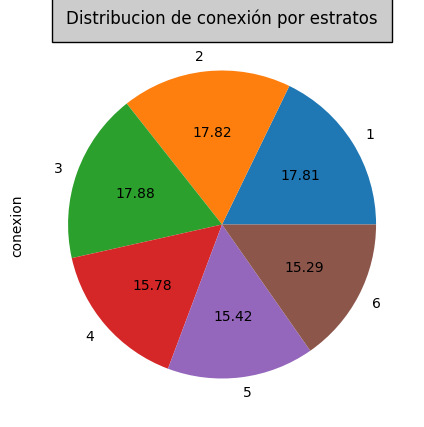

In [ ]:
# Agrupamos por estrato y sumamos las conexiones para obtener los datos para el pie chart
df_estrato_conexion = df_tarifas_gn.groupby('estrato')['conexion'].sum()

## grafica de torta
df_estrato_conexion.plot.pie(
    figsize=(5,5),  ## Establezco el tamaño de la grafica
    autopct="%.2f") ## Establezco que es en porcentaje
plt.title("Distribucion de conexión por estratos", bbox={'facecolor':'0.8','pad':10})
plt.show()

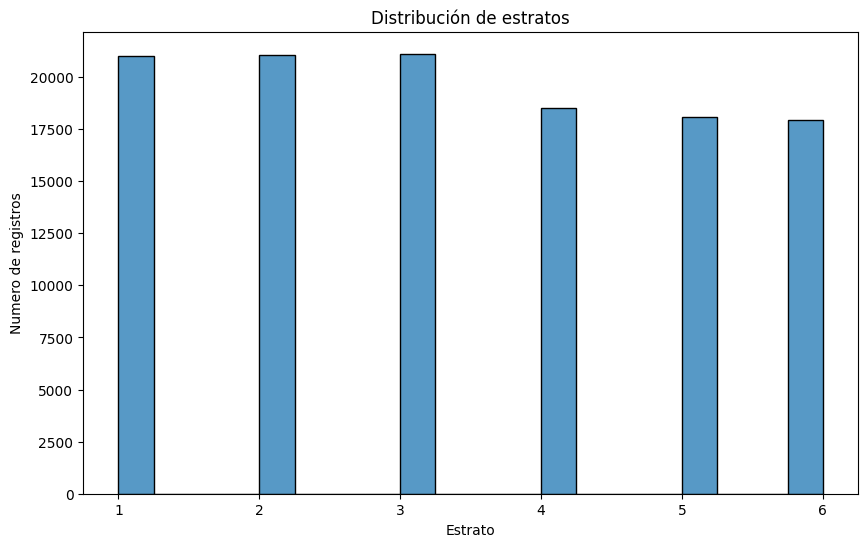

In [ ]:
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_tarifas_gn["estrato"],bins=20, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de estratos")
## Establezco titulo para el eje x
plt.xlabel("Estrato")
## Establezco titulo para el eje Y
plt.ylabel("Numero de registros")
## Imprima grafica en pantalla
plt.show()

### **Distribución de conexiones por cada estrato**

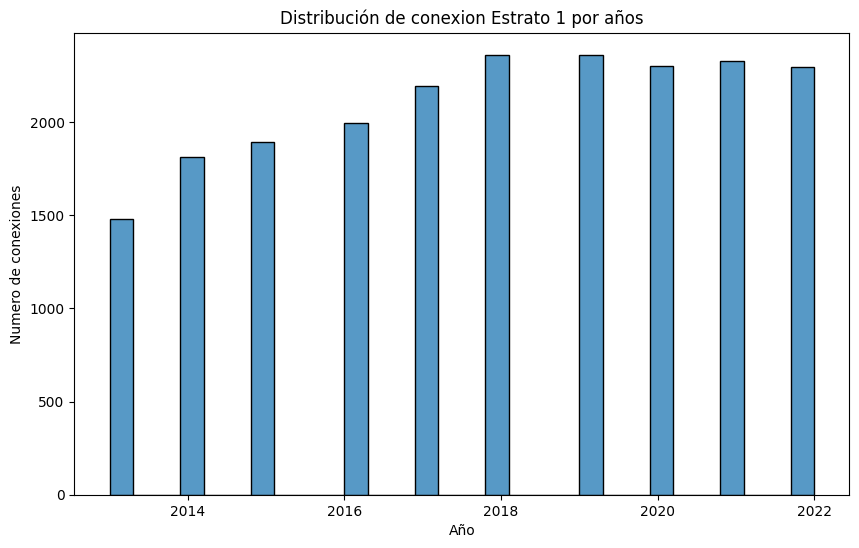

In [ ]:
## Histograma para estrato 1
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato1["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 1 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

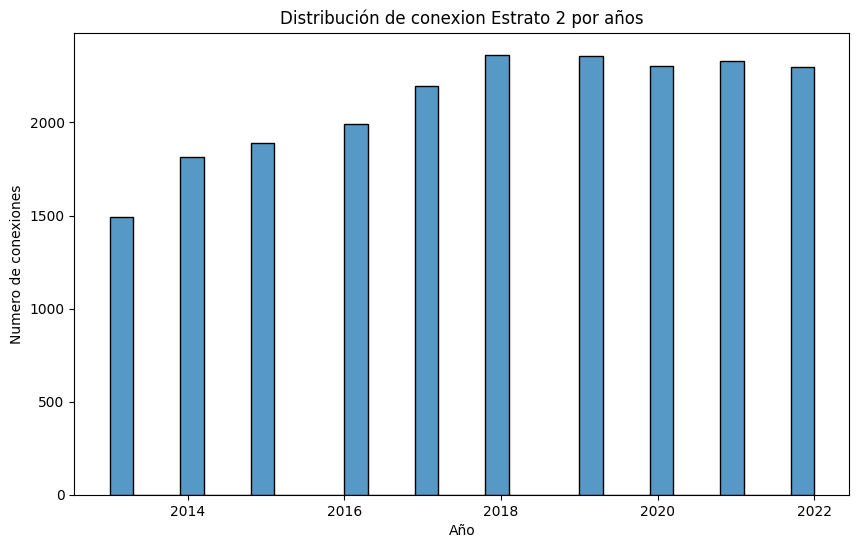

In [ ]:
## Histograma para estrato 2
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato2["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 2 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

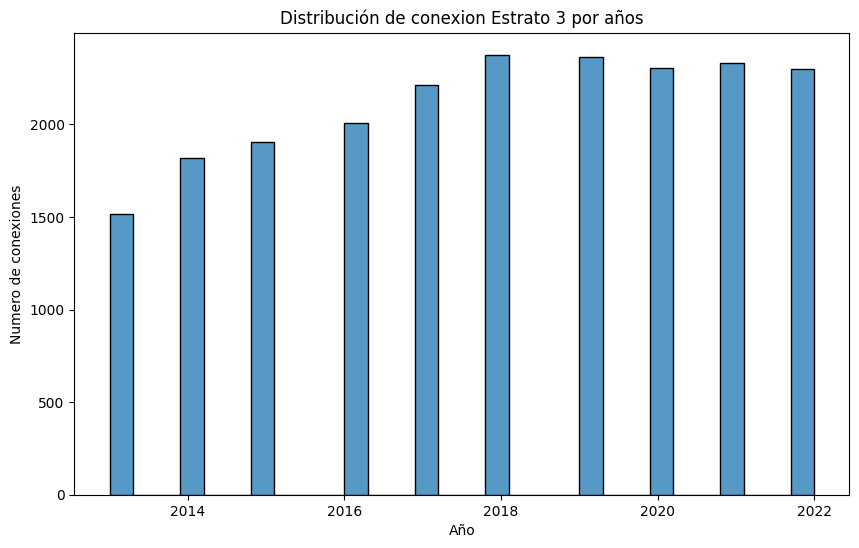

In [ ]:
## Histograma para estrato 3
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato3["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 3 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

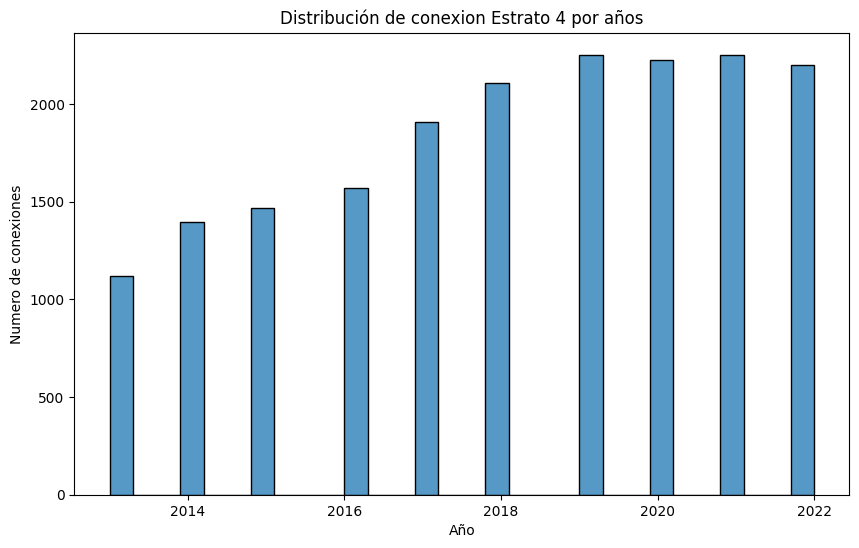

In [ ]:
## Histograma para estrato 4
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato4["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 4 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

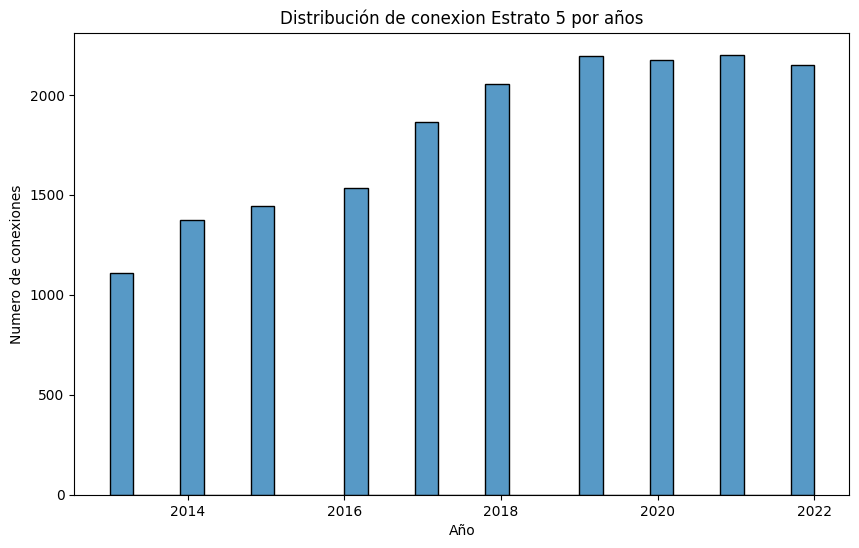

In [ ]:
## Histograma para estrato 5
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato5["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 5 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

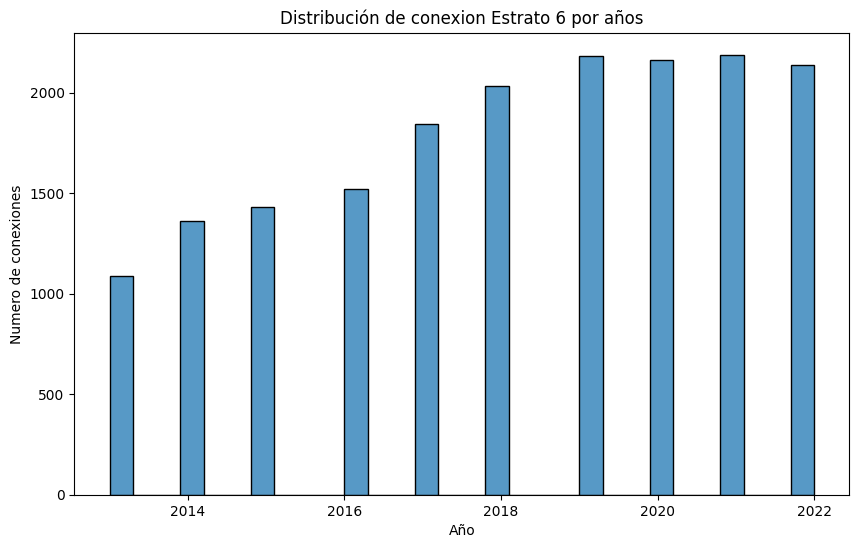

In [ ]:
## Histograma para estrato 6
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos el histograma
sns.histplot(df_estrato6["año"],bins=30, edgecolor="k")
## Establezco un titulo para el grafico
plt.title("Distribución de conexion Estrato 6 por años")
## Establezco titulo para el eje x
plt.xlabel("Año")
## Establezco titulo para el eje Y
plt.ylabel("Numero de conexiones")
## Imprima grafica en pantalla
plt.show()

### **Gráficos de barras y cajas**

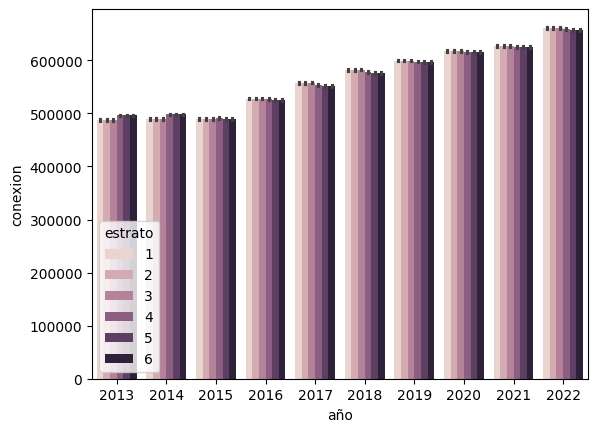

In [ ]:
## Graficos de barras para conexion VS año
sns.barplot(df_tarifas_gn, x="año", y="conexion", hue="estrato")
plt.show()

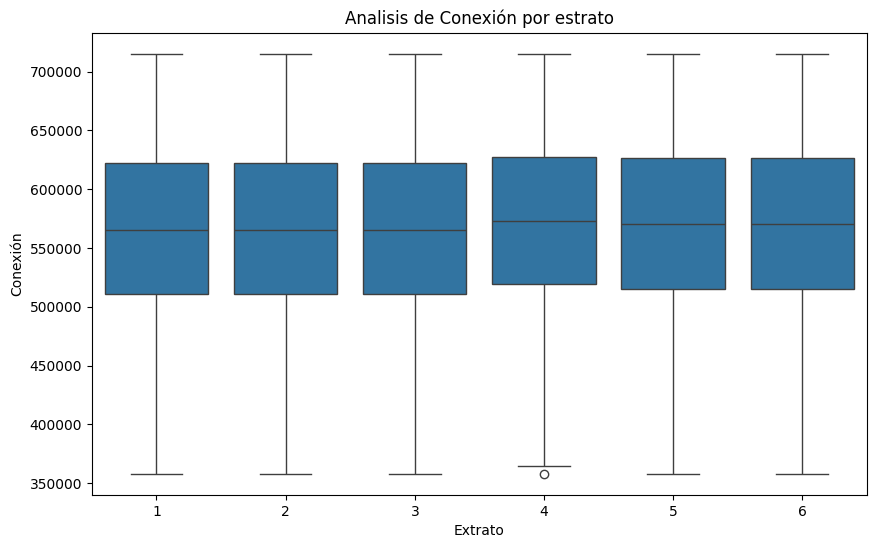

In [ ]:
## Grafico de cajas
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos cajas con variables categoricas
sns.boxplot(data=df_tarifas_gn, x='estrato', y='conexion')
## Establezco un titulo para el grafico
plt.title("Analisis de Conexión por estrato")
## Establezco titulo para el eje X
plt.xlabel("Extrato")
## Establezco titulo para el eje Y
plt.ylabel("Conexión")
## Imprima grafica en pantalla
plt.show()

## Graficos de cargo fijo

In [ ]:
## Agrupamos el estrato 1 con respecto al cargo fijo y el año
df_fijo_estrato1= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==1), ['cargo_fijo', 'año']]

In [ ]:
## Agrupamos el estrato 2 con respecto al cargofijo y el año
df_fijo_estrato2= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==2), ['cargo_fijo', 'año']]

In [ ]:
## Agrupamos el estrato 3 con respecto al cargo fijo y el año
df_fijo_estrato3= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==3), ['cargo_fijo', 'año']]

In [ ]:
## Agrupamos el estrato 4 con respecto al cargo fijo y el año
df_fijo_estrato4= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==4), ['cargo_fijo', 'año']]

In [ ]:
## Agrupamos el estrato 5 con respecto al cargo fijo y el año
df_fijo_estrato5= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==5), ['cargo_fijo', 'año']]

In [ ]:
## Agrupamos el estrato 6 con respecto al cargo fijo y el año
df_fijo_estrato6= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==6), ['cargo_fijo', 'año']]

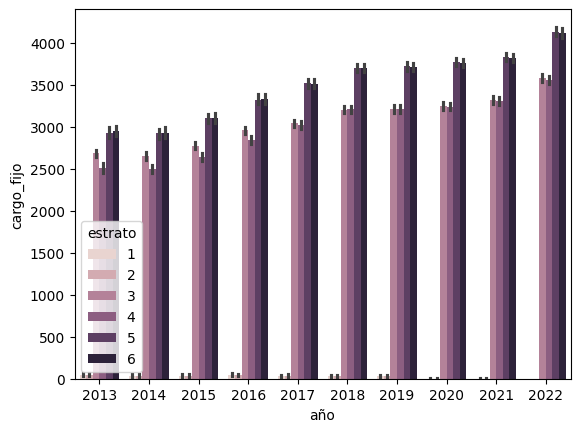

In [ ]:
## Graficos de barras para cargo fijo VS año
sns.barplot(df_tarifas_gn, x="año", y="cargo_fijo", hue="estrato")
plt.show()

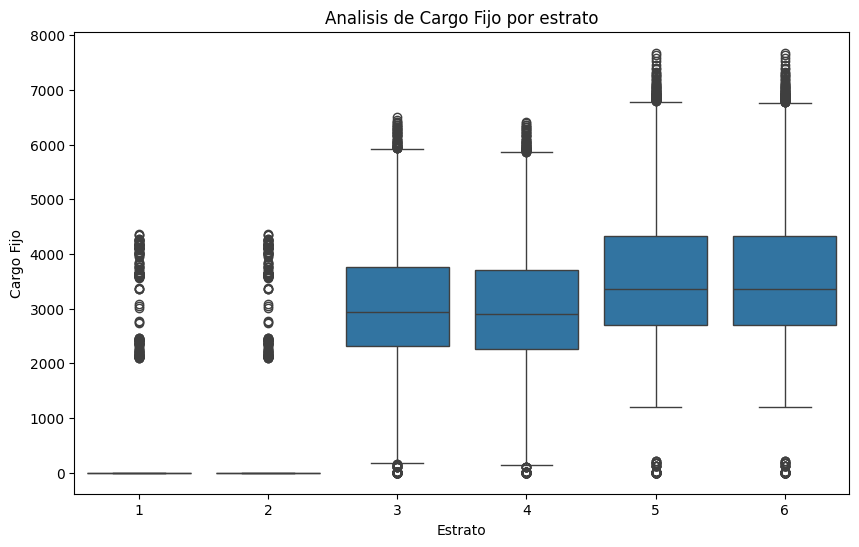

In [ ]:
## Grafico de cajas para cargo fijo
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos cajas con variables categoricas
sns.boxplot(data=df_tarifas_gn, x='estrato', y='cargo_fijo')
## Establezco un titulo para el grafico
plt.title("Analisis de Cargo Fijo por estrato")
## Establezco titulo para el eje X
plt.xlabel("Estrato")
## Establezco titulo para el eje Y
plt.ylabel("Cargo Fijo")
## Imprima grafica en pantalla
plt.show()

## Graficos de rango 0



In [ ]:
## Agrupamos el estrato 1 con respecto al rango 0 y el año
rango0_estrato1= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==1), ['rango_0', 'año']]

In [ ]:
## Agrupamos el estrato 2 con respecto al rango 0 y el año
rango0_estrato2= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==2), ['rango_0', 'año']]

In [ ]:
## Agrupamos el estrato 3 con respecto al rango 0 y el año
rango0_estrato3= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==3), ['rango_0', 'año']]

In [ ]:
## Agrupamos el estrato 4 con respecto al rango 0 y el año
rango0_estrato4= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==4), ['rango_0', 'año']]

In [ ]:
## Agrupamos el estrato 5 con respecto al rango 0 y el año
rango0_estrato5= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==5), ['rango_0', 'año']]

In [ ]:
## Agrupamos el estrato 6 con respecto al rango 0 y el año
rango0_estrato6= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==6), ['rango_0', 'año']]

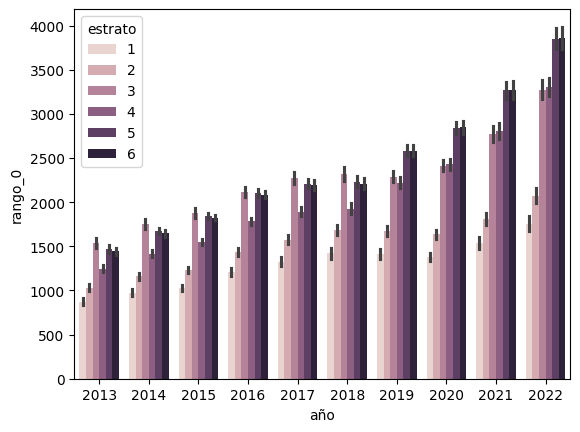

In [ ]:
## Graficos de barras para rango 0
sns.barplot(df_tarifas_gn, x="año", y="rango_0", hue="estrato")
plt.show()

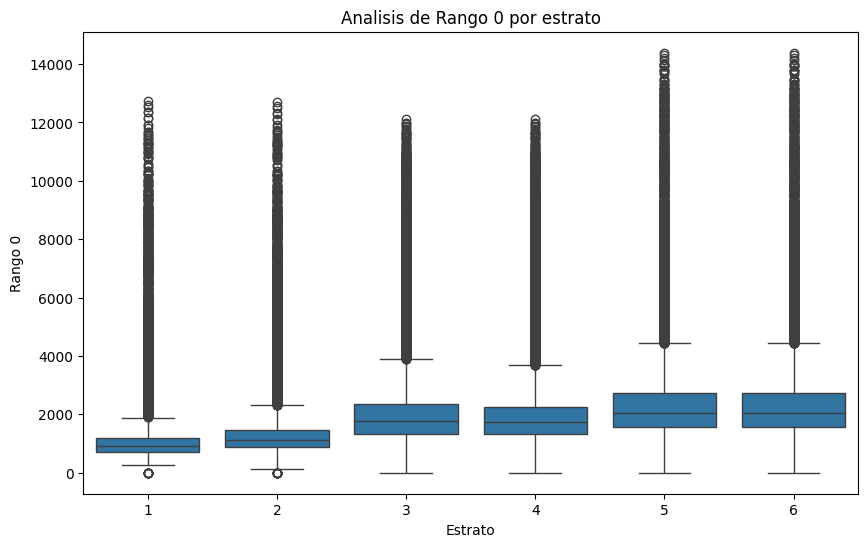

In [ ]:
## Grafico de cajas para rago 0
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos cajas con variables categoricas
sns.boxplot(data=df_tarifas_gn, x='estrato', y='rango_0')
## Establezco un titulo para el grafico
plt.title("Analisis de Rango 0 por estrato")
## Establezco titulo para el eje X
plt.xlabel("Estrato")
## Establezco titulo para el eje Y
plt.ylabel("Rango 0")
## Imprima grafica en pantalla
plt.show()

## Graficos de rango 21


In [ ]:
## Agrupamos el estrato 1 con respecto al rango 21 y el año
df_rango21_estrato1= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==1), ['rango_21', 'año']]

In [ ]:
## Agrupamos el estrato 2 con respecto al rango 21 y el año
df_rango21_estrato2= df_tarifas_gn.loc[(df_tarifas_gn['estrato']==2), ['rango_21', 'año']]

In [ ]:
## Agrupamos el estrato 3 con respecto al rango 21 y el año
df_rango21_estrato3 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==3), ['rango_21', 'año']]

In [ ]:
## Agrupamos el estrato 4 con respecto al rango 21 y el año
df_rango21_estrato4 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==4), ['rango_21', 'año']]

In [ ]:
## Agrupamos el estrato 5 con respecto al rango 21 y el año
df_rango21_estrato5 =df_tarifas_gn.loc[(df_tarifas_gn['estrato']==5), ['rango_21', 'año']]

In [ ]:
## Agrupamos el estrato 6 con respecto al rango 21 y el año
df_rango21_estrato6 = df_tarifas_gn.loc[(df_tarifas_gn['estrato']==6), ['rango_21', 'año']]

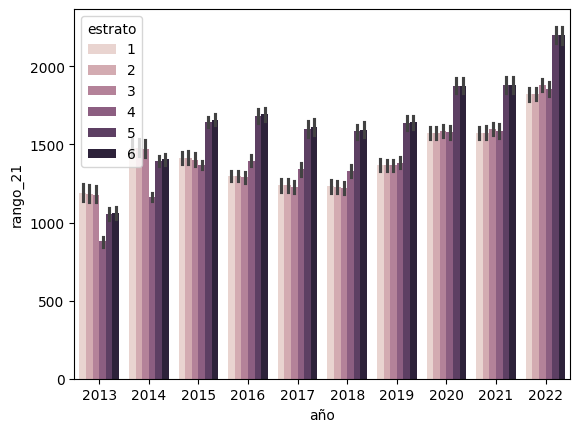

In [ ]:
## Graficos de barras para rango 21
sns.barplot(df_tarifas_gn, x="año", y="rango_21", hue="estrato")
plt.show()

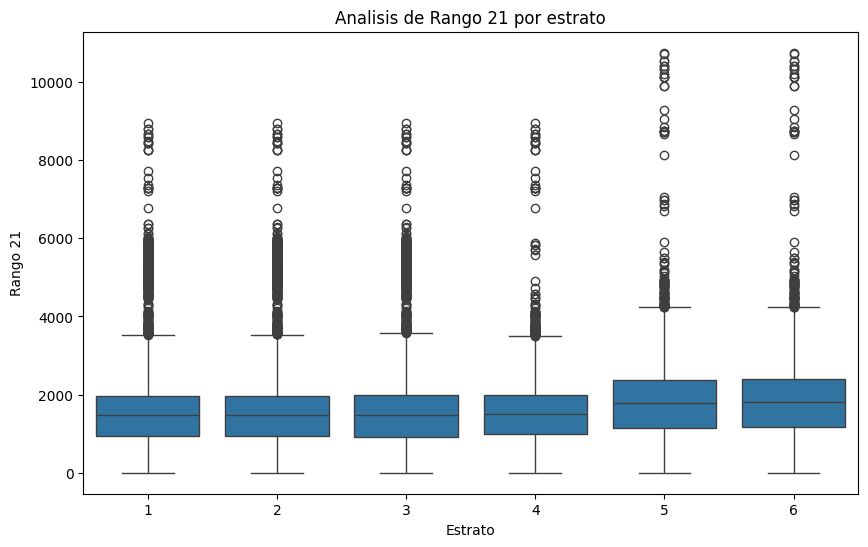

In [ ]:
## Grafico de cajas para rango 21
## Creamos el tamaño de la grafica
plt.figure(figsize=(10,6))
## Creamos cajas con variables categoricas como sexo para analizar por edades
sns.boxplot(data=df_tarifas_gn, x='estrato', y='rango_21')
## Establezco un titulo para el grafico
plt.title("Analisis de Rango 21 por estrato")
## Establezco titulo para el eje X
plt.xlabel("Estrato")
## Establezco titulo para el eje Y
plt.ylabel("Rango 21")
## Imprima grafica en pantalla
plt.show()

## Matriz de Correlación

In [ ]:
## Hallamos la correlación entre las variables que se estan evaluando
corr1 = df_tarifas_gn.set_index(['año','mes','reinstalacion','reconexion']).corr(numeric_only=True)

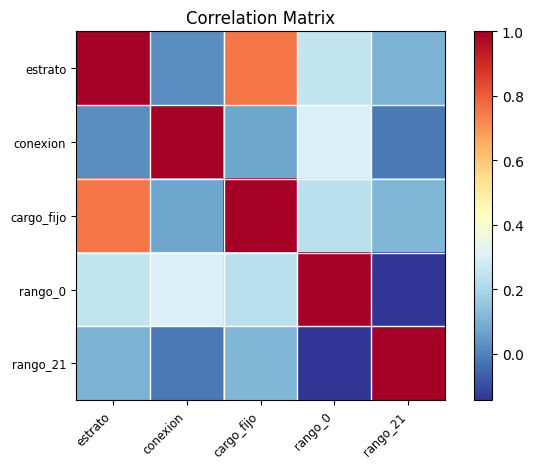

In [ ]:
## Matriz de correlación
sm.graphics.plot_corr(corr1, xnames=list(corr1.columns))
plt.show()

## Análisis Top 5 Empresas Colombianas por número de servicios

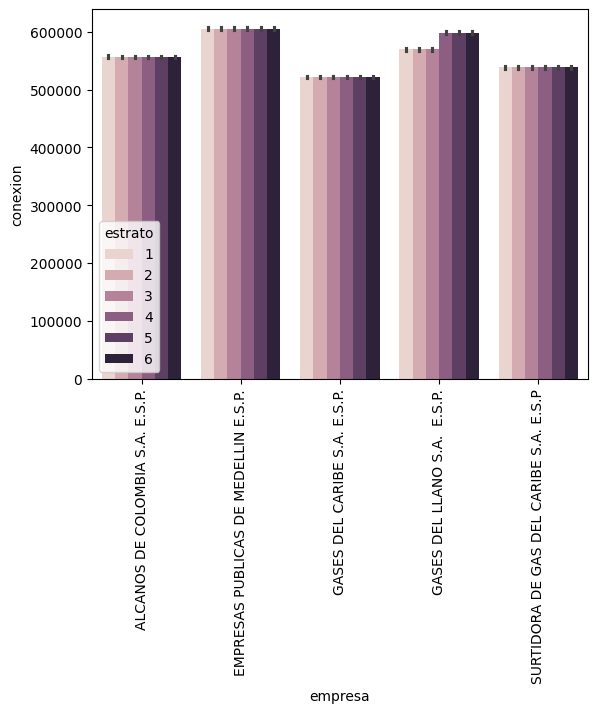

In [ ]:
## filtramos el top de 5 empresas con mas servicios
empresas_top5 = df_tarifas_gn.groupby("empresa").size().sort_values(ascending=False).head(5)
df_empresas_top5= pd.DataFrame(empresas_top5)
df_empresas_top5 = df_empresas_top5.reset_index()
# Resetamos el indice para volver 'empresa' una columna
df_empresas_top5.columns = ['empresa', 'count']


# Filtramos df_tarifas_gn para ncluir solo el top 5 de compañias
filtered_df = df_tarifas_gn[df_tarifas_gn['empresa'].isin(df_empresas_top5['empresa'])]

## Graficos de barras para conexion y empresa
sns.barplot(filtered_df, x='empresa', y="conexion", hue="estrato")
plt.xticks(rotation=90)
plt.show()

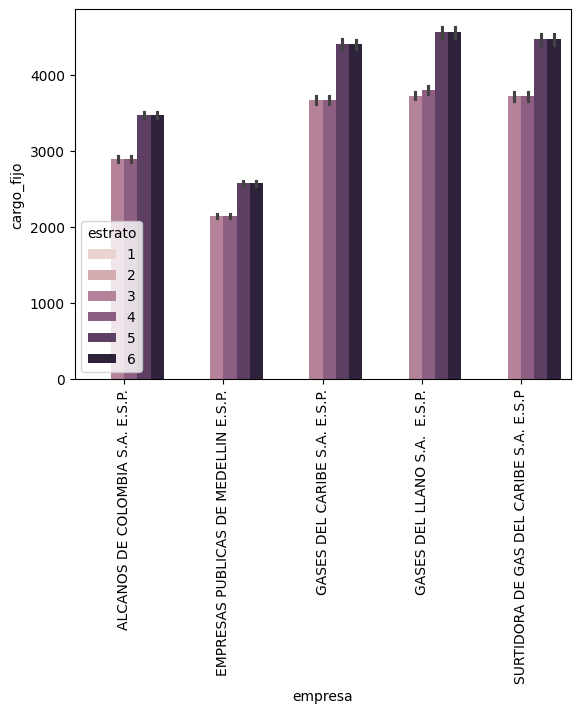

In [ ]:
## Graficos de barras para cargo fijo y empresa
sns.barplot(filtered_df, x="empresa", y="cargo_fijo", hue="estrato")
plt.xticks(rotation=90)
plt.show()

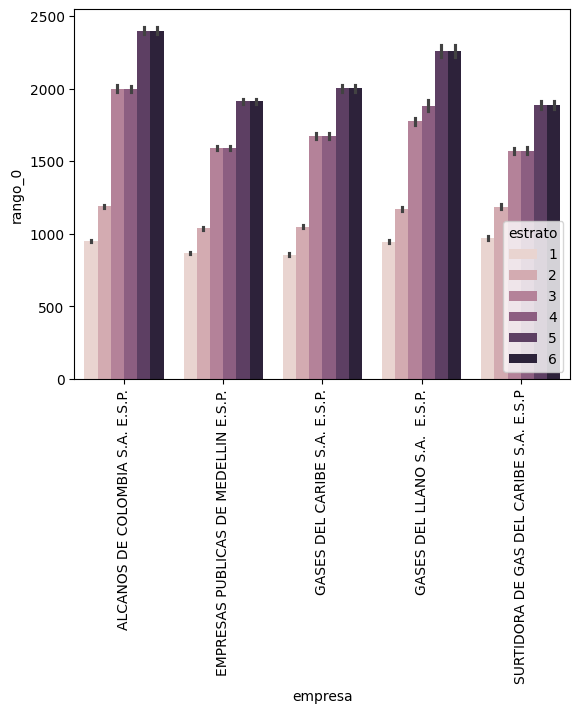

In [ ]:
## Graficos de barras para rango 0 y empresa
sns.barplot(filtered_df, x="empresa", y="rango_0", hue="estrato")
plt.xticks(rotation=90)
plt.show()

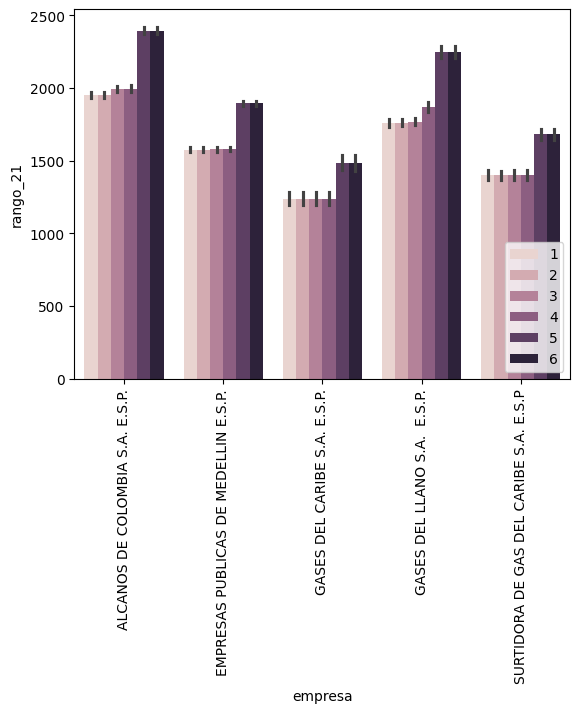

In [ ]:
## Graficos de barras para rango 21 y empresa
sns.barplot(filtered_df, x="empresa", y="rango_21", hue="estrato")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

#**ANÁLISIS ESTADISTICO**

In [ ]:
## Hallamos la varianza de conexión
varianza_conexion = np.var(df_tarifas_gn['conexion'], ddof = 1)
varianza_conexion

4922064223.532464

In [ ]:
## Hallamos la varianza de cargo fijo
varianza_fijo = np.var(df_tarifas_gn['cargo_fijo'], ddof = 1)
varianza_fijo

3452326.539569787

In [ ]:
## Hallamos la varianza de rango 0
varianza_rango0 = np.var(df_tarifas_gn['rango_0'], ddof = 1)
varianza_rango0

2934898.336280019

In [ ]:
## Hallamos la varianza de rango 21
varianza_rango21 = np.var(df_tarifas_gn['rango_21'], ddof = 1)
varianza_rango21

1014292.0797878212

In [ ]:
## Hallamos la moda de conexión
mode_conexion = stats.mode(df_tarifas_gn['conexion'])
print(f'La moda de la columna conexion es {mode_conexion.mode}')

La moda de la columna conexion es 540798.0


In [ ]:
## Hallamos la moda de cargo fijo
mode_fijo = stats.mode(df_tarifas_gn['cargo_fijo'])
print(f'La moda de la columna cargo fijo es {mode_fijo.mode}')

La moda de la columna cargo fijo es 0.0


In [ ]:
## Hallamos la moda de rango 0
mode_rango0 = stats.mode(df_tarifas_gn['rango_0'])
print(f'La moda de la columna rango 0 es {mode_rango0.mode}')

La moda de la columna rango 0 es 2015.64


In [ ]:
## Hallamos la moda de rango 21
mode_rango21 = stats.mode(df_tarifas_gn['rango_21'])
print(f'La moda de la columna rango 21 es {mode_rango21.mode}')

La moda de la columna rango 21 es 0.0


In [ ]:
## Hallamos la curtosis de cargo fijo
curtosis_fijo = df_tarifas_gn["cargo_fijo"].kurt()
print(f"La curtosis del cargo fijo es: {round(curtosis_fijo, 3)}")

La curtosis del cargo fijo es: -1.077


In [ ]:
## Hallamos la curtosis de conexion
curtosis_conexion = df_tarifas_gn["conexion"].kurt()
print(f"La curtosis del conexion es: {round(curtosis_conexion, 3)}")

La curtosis del conexion es: -0.29


In [ ]:
## Hallamos la curtosis de rango 0
curtosis_rango0 = df_tarifas_gn["rango_0"].kurt()
print(f"La curtosis del rango 0 es: {round(curtosis_rango0, 3)}")

La curtosis del rango 0 es: 9.761


In [ ]:
## Hallamos la curtosis de rango 21
curtosis_rango21 = df_tarifas_gn["rango_21"].kurt()
print(f"La curtosis del rango 0 es: {round(curtosis_rango21, 3)}")

La curtosis del rango 0 es: 3.826


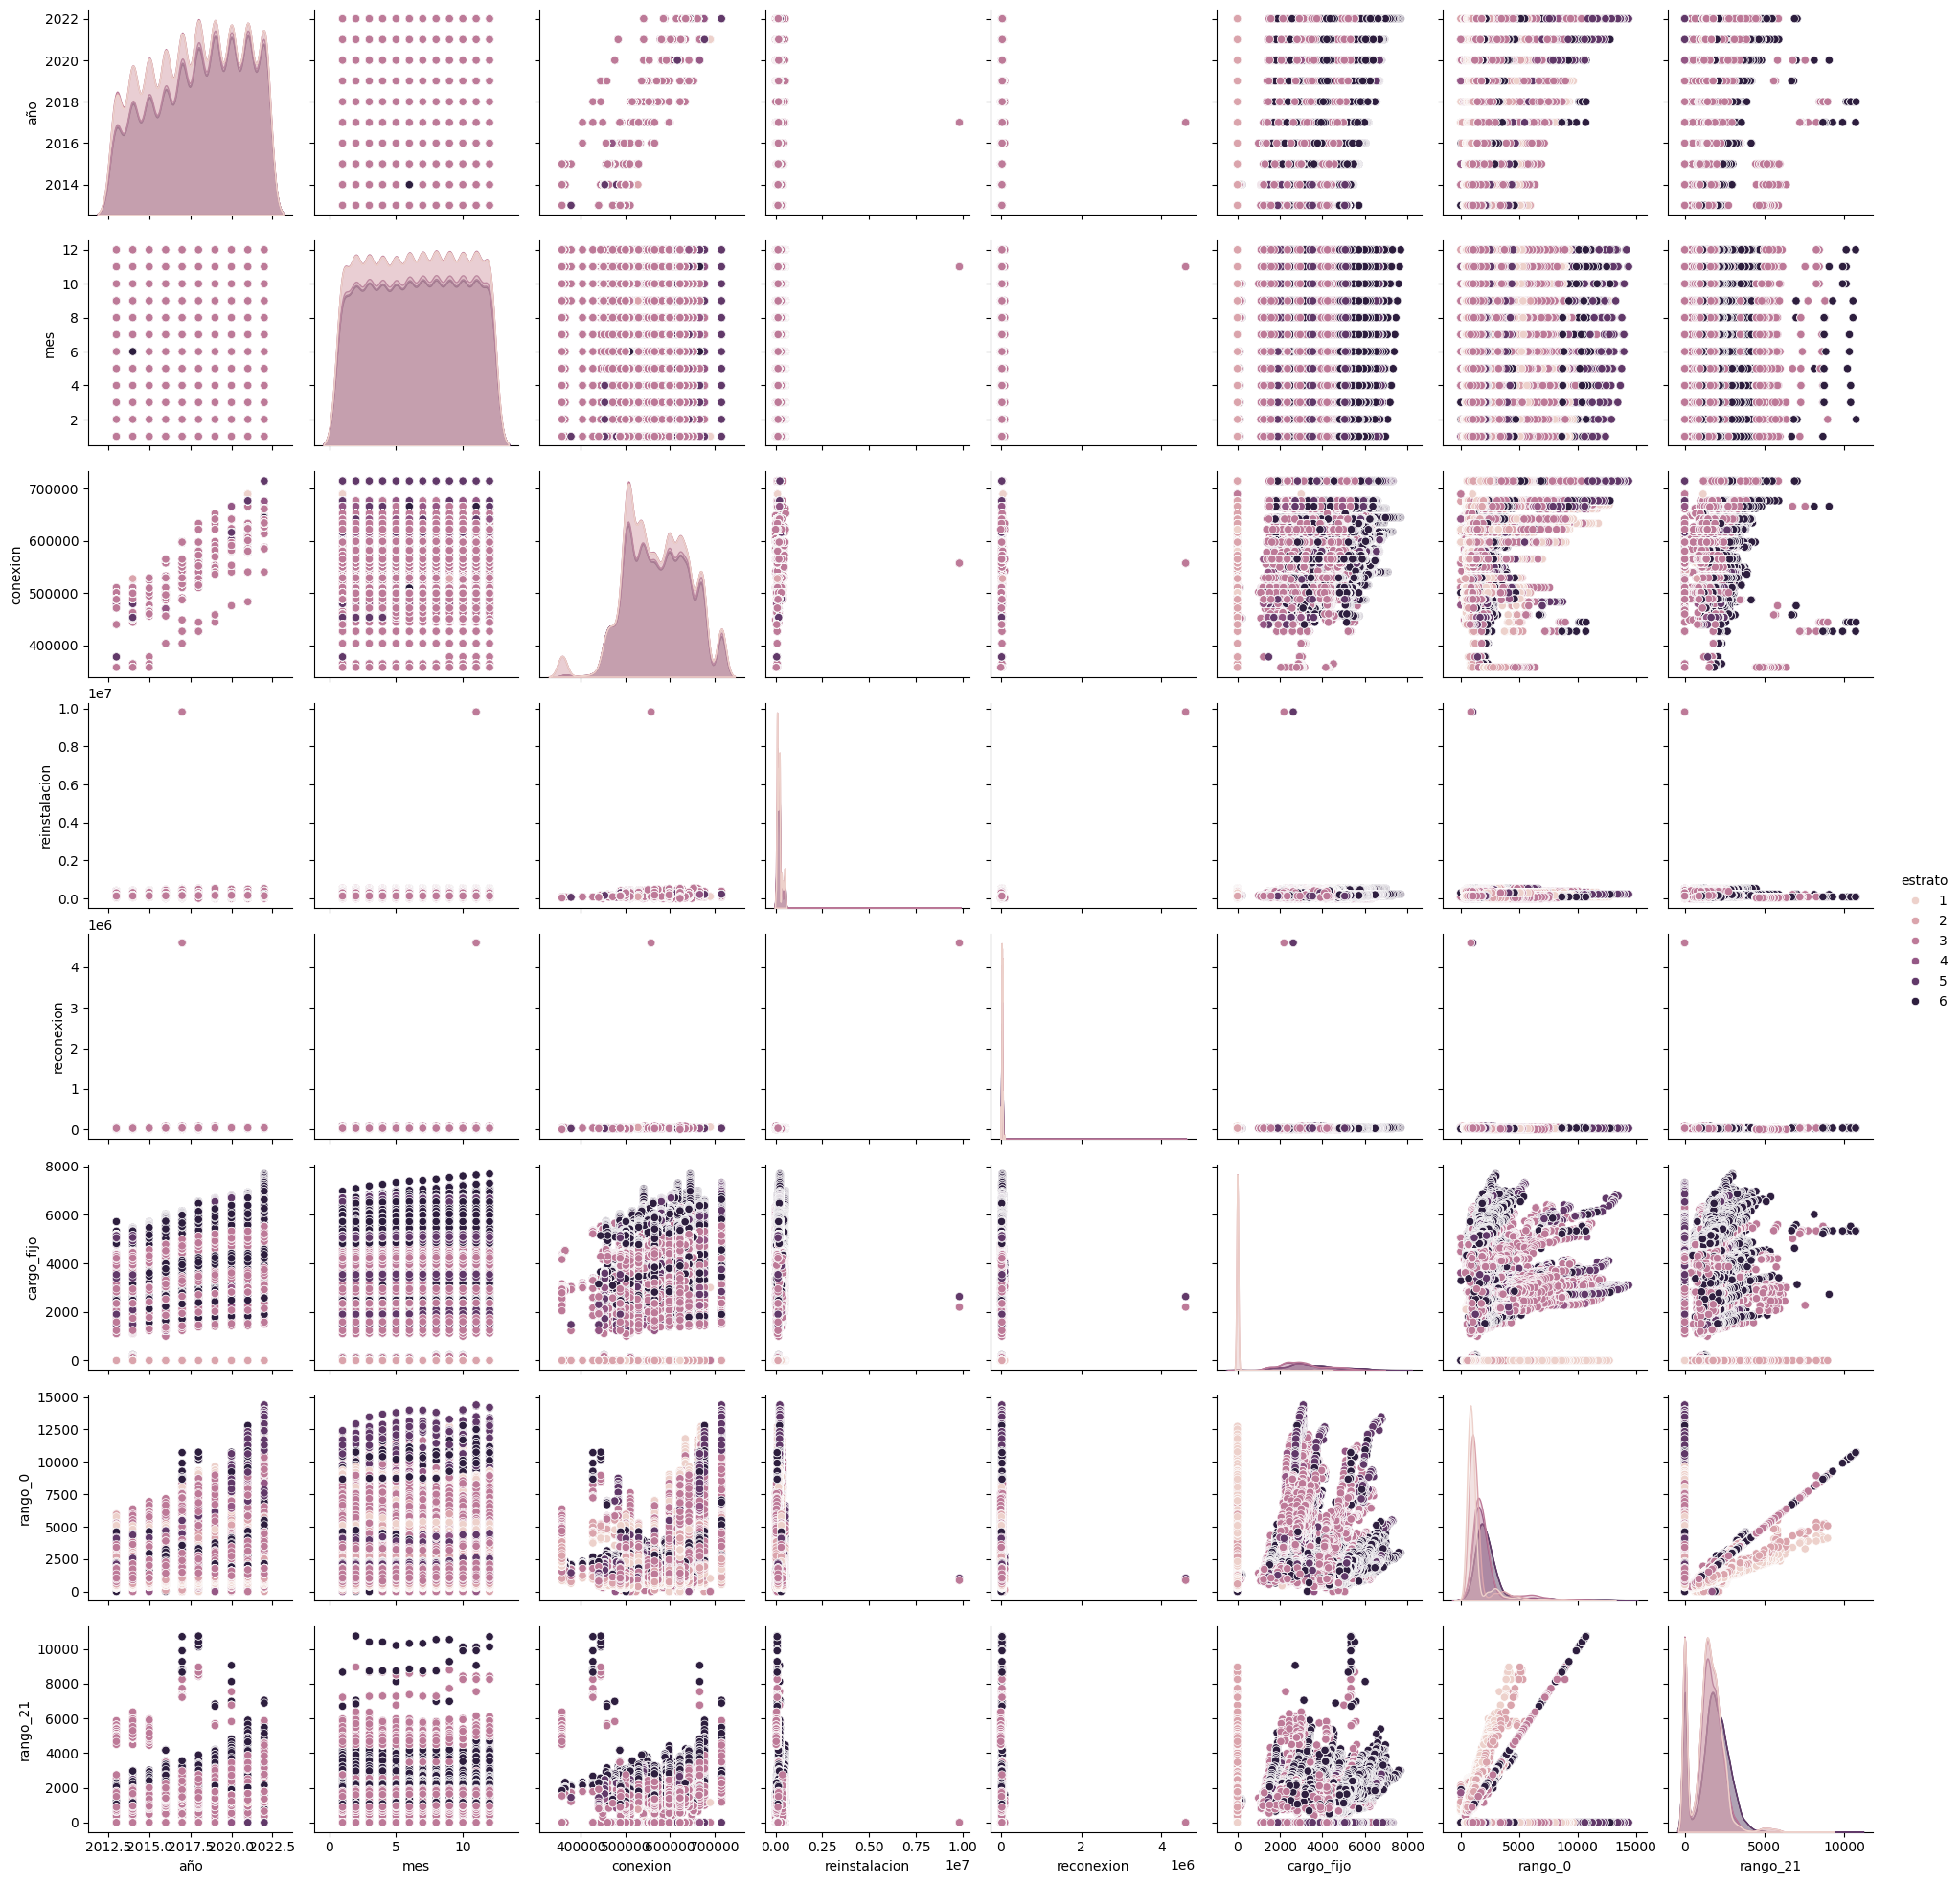

In [ ]:
## Grafico de dispersión de todo el DF
sns.pairplot(df_tarifas_gn, hue="estrato")
plt.show()